**Name: Raven Jacinto** <br>
**Course and Section: CPE019 - CPE32S3** <br>
**Date of Submission: April 2, 2024** <br>
**Instructor: Engr. Roman Richard** <br>
**Activity: Hands-on Activity 6.1 Neural Networks** <br>

# Activity 1.1 : Neural Networks

#### Objective(s):

This activity aims to demonstrate the concepts of neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use activation function in neural networks
* Demonstrate how to apply feedforward and backpropagation in neural networks


#### Resources:
* Jupyter Notebook


#### Procedure:

Import the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Define and plot an activation function

### Sigmoid function:

$$
\sigma = \frac{1}{1 + e^{-x}}
$$

$\sigma$ ranges from (0, 1). When the input $x$ is negative, $\sigma$ is close to 0. When $x$ is positive, $\sigma$ is close to 1. At $x=0$, $\sigma=0.5$

In [ ]:
## create a sigmoid function
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

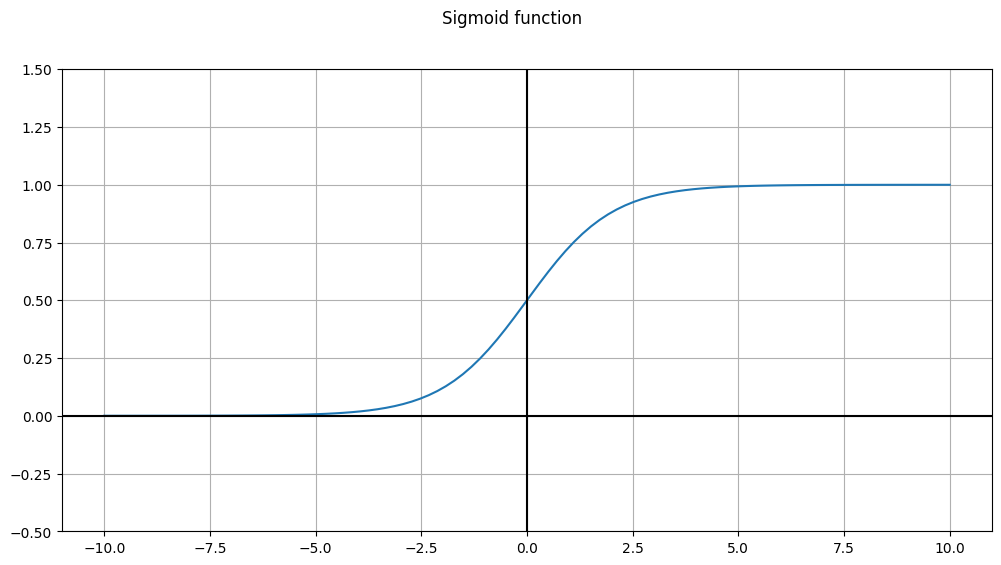

In [ ]:
# Plot the sigmoid function
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Sigmoid function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

Choose any activation function and create a method to define that function.

In [ ]:
## create a softmax function
## numpy is already imported as np in the first cell

def softmax(x):
    """Softmax function"""
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)


Plot the activation function

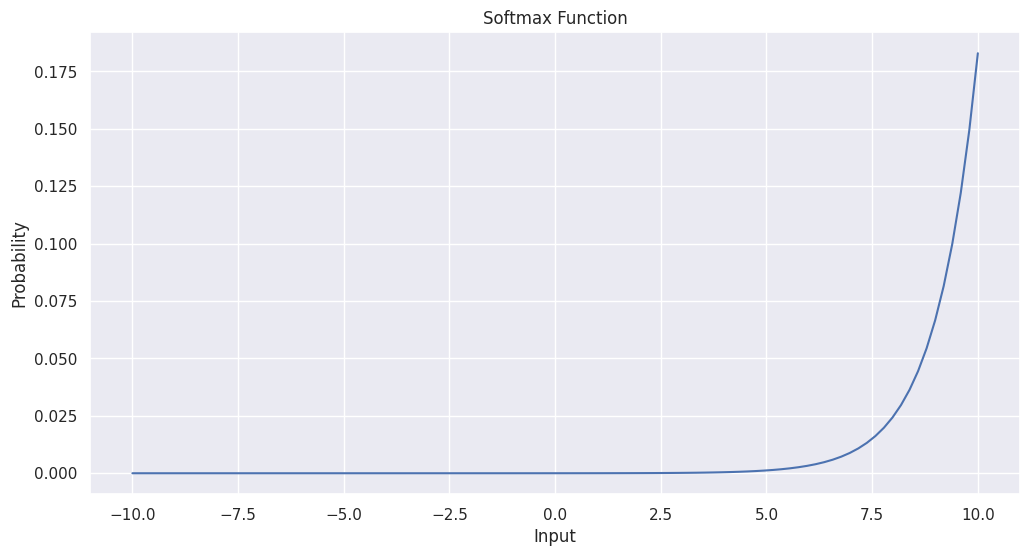

In [ ]:
# Plot the softmax function

import seaborn as sns

x = np.linspace(-10, 10, num=100, dtype=np.float32)
softmax_arr = softmax(x)

sns.set_theme()
plt.figure(figsize=(12,6))
plt.plot(x, softmax_arr)
plt.title("Softmax Function")
plt.xlabel("Input")
plt.ylabel("Probability")
plt.show()

### Neurons as boolean logic gates



### OR Gate

<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

A neuron that uses the sigmoid activation function outputs a value between (0, 1). This naturally leads us to think about boolean values.



By limiting the inputs of $x_1$ and $x_2$ to be in $\left\{0, 1\right\}$, we can simulate the effect of logic gates with our neuron. The goal is to find the weights , such that it returns an output close to 0 or 1 depending on the inputs.

What numbers for the weights would we need to fill in for this gate to output OR logic? Observe from the plot above that $\sigma(z)$ is close to 0 when $z$ is largely negative (around -10 or less), and is close to 1 when $z$ is largely positive (around +10 or greater).

$$
z = w_1 x_1 + w_2 x_2 + b
$$

Let's think this through:

* When $x_1$ and $x_2$ are both 0, the only value affecting $z$ is $b$. Because we want the result for (0, 0) to be close to zero, $b$ should be negative (at least -10)
* If either $x_1$ or $x_2$ is 1, we want the output to be close to 1. That means the weights associated with $x_1$ and $x_2$ should be enough to offset $b$ to the point of causing $z$ to be at least 10.
* Let's give $b$ a value of -10. How big do we need $w_1$ and $w_2$ to be?
    * At least +20
* So let's try out $w_1=20$, $w_2=20$, and $b=-10$!

In [ ]:
def logic_gate(w1, w2, b):
    # Helper to create logic gate functions
    # Plug in values for weight_a, weight_b, and bias
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test(gate):
    # Helper function to test out our weight functions.
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

In [ ]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

Try finding the appropriate weight values for each truth table.

### AND Gate

<table>

<tr>
<th colspan="3">AND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>


Try to figure out what values for the neurons would make this function as an AND gate.

In [ ]:
# Fill in the w1, w2, and b parameters such that the truth table matches
w1 = 20
w2 = 20
b = -30
and_gate = logic_gate(w1, w2, b)

test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


Do the same for the NOR gate and the NAND gate.

In [ ]:
w1 = -20
w2 = -20
b = 10
nor_gate = logic_gate(w1, w2, b)

test(nor_gate)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


In [ ]:
w1 = -10
w2 = -10
b = 15
nand_gate = logic_gate(w1, w2, b)

test(nand_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## Limitation of single neuron

 Here's the truth table for XOR:

### XOR (Exclusive Or) Gate

<table>

<tr>
<th colspan="3">XOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

Now the question is, can you create a set of weights such that a single neuron can output this property?

It turns out that you cannot. Single neurons can't correlate inputs, so it's just confused. So individual neurons are out. Can we still use neurons to somehow form an XOR gate?


ANS: Single neuron cannot directly implement an XOR gate because it can only draw a straight line (linear decision boundary) to separate input categories. However, we can use a multi-layer perceptron (MLP), which is made up of multiple neurons arranged in layers, to achieve XOR functionality.

In [ ]:
# Make sure you have or_gate, nand_gate, and and_gate working from above!
def xor_gate(a, b):
    c = or_gate(a, b)
    d = nand_gate(a, b)
    return and_gate(c, d)

# Test the xor_gate function
test(xor_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## Feedforward Networks

The feed-forward computation of a neural network can be thought of as matrix calculations and activation functions.  We will do some actual computations with matrices to see this in action.

## Exercise
Provided below are the following:

- Three weight matrices `W_1`, `W_2` and `W_3` representing the weights in each layer.  The convention for these matrices is that each $W_{i,j}$ gives the weight from neuron $i$ in the previous (left) layer to neuron $j$ in the next (right) layer.  
- A vector `x_in` representing a single input and a matrix `x_mat_in` representing 7 different inputs.
- Two functions: `soft_max_vec` and `soft_max_mat` which apply the soft_max function to a single vector, and row-wise to a matrix.

The goals for this exercise are:
1. For input `x_in` calculate the inputs and outputs to each layer (assuming sigmoid activations for the middle two layers and soft_max output for the final layer.
2. Write a function that does the entire neural network calculation for a single input
3. Write a function that does the entire neural network calculation for a matrix of inputs, where each row is a single input.
4. Test your functions on `x_in` and `x_mat_in`.

This illustrates what happens in a NN during one single forward pass. Roughly speaking, after this forward pass, it remains to compare the output of the network to the known truth values, compute the gradient of the loss function and adjust the weight matrices `W_1`, `W_2` and `W_3` accordingly, and iterate. Hopefully this process will result in better weight matrices and our loss will be smaller afterwards

In [ ]:
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])
x_in = np.array([.5,.8,.2])
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],[.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])

def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

print('the matrix W_1\n')
print(W_1)
print('-'*30)
print('vector input x_in\n')
print(x_in)
print ('-'*30)
print('matrix input x_mat_in -- starts with the vector `x_in`\n')
print(x_mat_in)

the matrix W_1

[[ 2 -1  1  4]
 [-1  2 -3  1]
 [ 3 -2 -1  5]]
------------------------------
vector input x_in

[0.5 0.8 0.2]
------------------------------
matrix input x_mat_in -- starts with the vector `x_in`

[[0.5 0.8 0.2]
 [0.1 0.9 0.6]
 [0.2 0.2 0.3]
 [0.6 0.1 0.9]
 [0.5 0.5 0.4]
 [0.9 0.1 0.9]
 [0.1 0.8 0.7]]


## Exercise
1. Get the product of array x_in and W_1 (z2)
2. Apply sigmoid function to z2 that results to a2
3. Get the product of a2 and z2 (z3)
4. Apply sigmoid function to z3 that results to a3
5. Get the product of a3 and z3 that results to z4


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_propagation(x_in, W1, W2):

    #Get the product of array x_in and W1 (z2)
    z2 = np.dot(x_in, W_1)

    #Apply the sigmoid function to z2 that results in a2
    a2 = sigmoid(z2)

    #Get the product of a2 and z2 (z3)
    z3 = np.dot(a2, z2)

    #Apply the sigmoid function to z3 that results in a3
    a3 = sigmoid(z3)

    #Get the product of a3 and z3 that results in z4
    z4 = np.dot(a3, z3)

    return z2, a2, z3, a3, z4

#Using Forward Propagation
z2, a2, z3, a3, z4 = forward_propagation(x_in, W_1, W_2)


print("z2:", z2)
print("a2:", a2)
print("z3:", z3)
print("a3:", a3)
print("z4:", z4)

z2: [ 0.8  0.7 -2.1  3.8]
a2: [0.68997448 0.66818777 0.10909682 0.97811873]
z3: 4.507458871351723
a3: 0.9890938122523221
z4: 4.458299678635824


In [ ]:
def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))


7. Apply soft_max_vec function to z4 that results to y_out

In [ ]:
y_out = soft_max_vec(z4)

print(y_out)

1.0


In [ ]:
## A one-line function to do the entire neural net computation

def nn_comp_vec(x):
    return soft_max_vec(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

def nn_comp_mat(x):
    return soft_max_mat(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

In [ ]:
nn_comp_vec(x_in)

array([0.72780576, 0.26927918, 0.00291506])

In [ ]:
nn_comp_mat(x_mat_in)

array([[0.72780576, 0.26927918, 0.00291506],
       [0.62054212, 0.37682531, 0.00263257],
       [0.69267581, 0.30361576, 0.00370844],
       [0.36618794, 0.63016955, 0.00364252],
       [0.57199769, 0.4251982 , 0.00280411],
       [0.38373781, 0.61163804, 0.00462415],
       [0.52510443, 0.4725011 , 0.00239447]])

## Backpropagation
The backpropagation in this part will be used to train a multi-layer perceptron (with a single hidden layer).  Different patterns will be used and the demonstration on how the weights will converge. The different parameters such as learning rate, number of iterations, and number of data points will be demonstrated

In [ ]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?

The neural network learned the centered square pattern quickly since it is easy to implement and it creates a clear separation between the two classes. At first iteration it got 73.4% and jump up to 94.2% in the second iteration which means that is was learning quickly unlike the other pattern.

The thin right angle pattern took longer to learn maybe because of the complexity of its code and the way it process the data. Since the first iteration gave us 69.8%, its 2nd iteration only gave 86.8%, and then 94.6% for the third iteration. It is the only pattern that took 2 iteration before reaching 90+ %. Therefore, it learns slower than the other patterns.

- What learning rates and numbers of iterations worked well?

For the thin and thick right angle pattern, centered square, and circle pattern, learning rate of 0.01 and around 2000 iterations worked very well. Averaging 97% at the final iterations. For the diamond pattern, a smaller learning rate  like 0.001 and more iterations like 1000 were effective since at 2000 iterations, it only gave 95% accuracy but when it runs in 1000 iteration, it gives 98% accuracy.

shape of x_mat_full is (500, 3)
shape of y is (500,)


<ipython-input-28-431b62c6f11b>:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
<ipython-input-28-431b62c6f11b>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


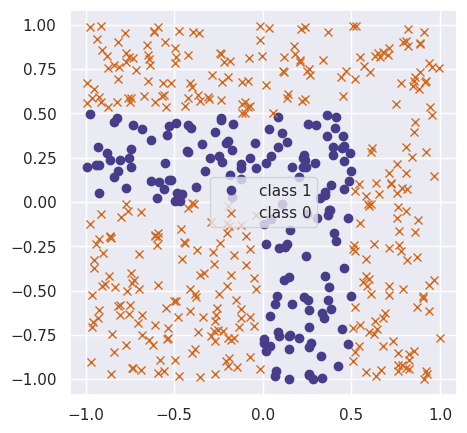

In [ ]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
#y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
#y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
#y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
#y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

In [ ]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)

    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Complete the pseudocode below

In [ ]:
# Initialize the network parameters
np.random.seed(1241)
W_1 = np.random.randn(3, 4)  # Random weights for input to hidden layer
W_2 = np.random.randn(4)  # Random weights for hidden layer to output
num_iter = 2000
learning_rate = 0.01
x_mat = x_mat_full

loss_vals, accuracies = [], []
for i in range(num_iter):
    # Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W_1, W_2)

    # Update the weight matrices
    W_1 -= learning_rate * gradient[0]
    W_2 -= learning_rate * gradient[1]

    # Compute loss
    loss = loss_fn(y, y_pred)
    loss_vals.append(loss)

    # Compute accuracy
    accuracy = np.mean((y_pred >= 0.5) == y)
    accuracies.append(accuracy)

    # Print loss and accuracy for every 200th iteration
    if i % 200 == 0:
        print("Thin Right Angle Pattern")
        print(f"Iteration {i}: Loss = {loss}, Accuracy = {accuracy}")


Thin Right Angle Pattern
Iteration 0: Loss = 0.6464558084992771, Accuracy = 0.696
Thin Right Angle Pattern
Iteration 200: Loss = 0.3000832786838613, Accuracy = 0.866
Thin Right Angle Pattern
Iteration 400: Loss = 0.16499198076447172, Accuracy = 0.906
Thin Right Angle Pattern
Iteration 600: Loss = 0.13065140196589708, Accuracy = 0.946
Thin Right Angle Pattern
Iteration 800: Loss = 0.09697315221191266, Accuracy = 0.984
Thin Right Angle Pattern
Iteration 1000: Loss = 0.08799474876611856, Accuracy = 0.99
Thin Right Angle Pattern
Iteration 1200: Loss = 0.09022003212278935, Accuracy = 0.972
Thin Right Angle Pattern
Iteration 1400: Loss = 0.08846571853928074, Accuracy = 0.972
Thin Right Angle Pattern
Iteration 1600: Loss = 0.08387187024178207, Accuracy = 0.978
Thin Right Angle Pattern
Iteration 1800: Loss = 0.08066798147734573, Accuracy = 0.98


Plot the predicted answers, with mistakes in yellow

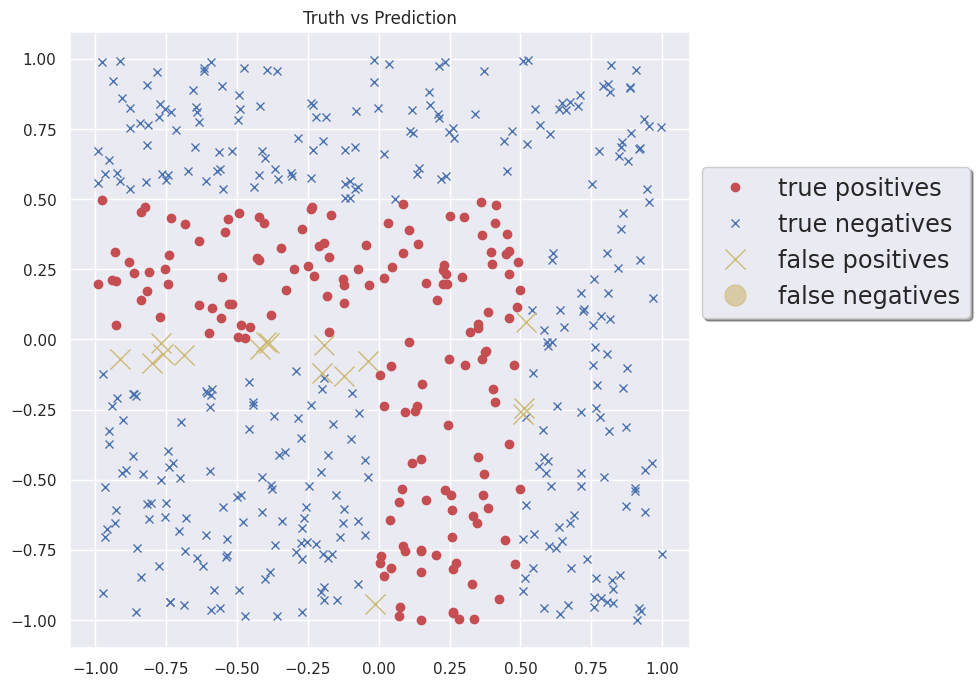

In [ ]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

## Using Centered Square Results

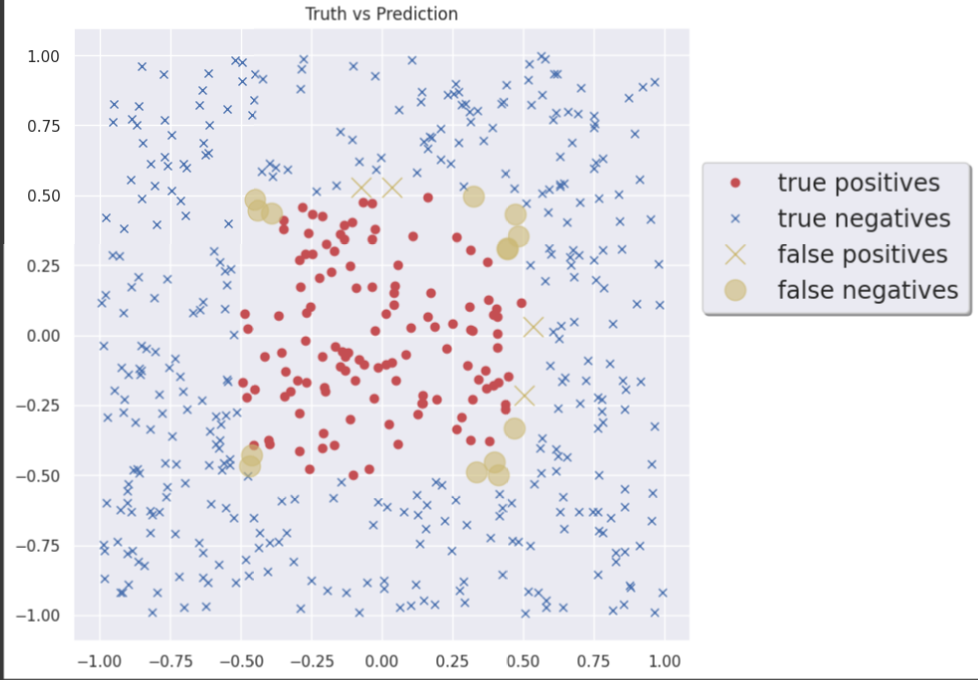

## @ 2000 iterations

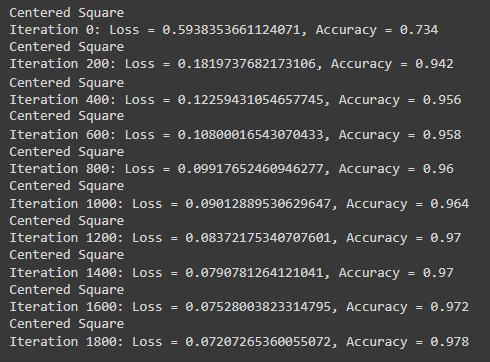


## Circle Pattern Results

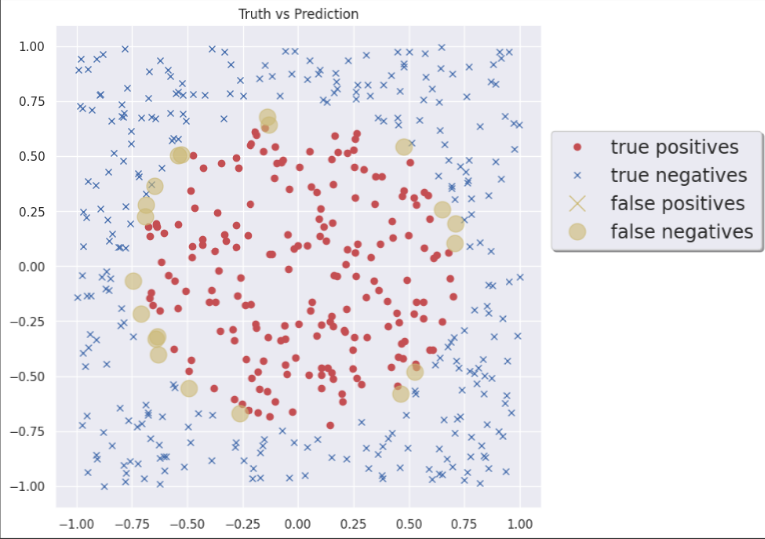

## @ 2000 iterations

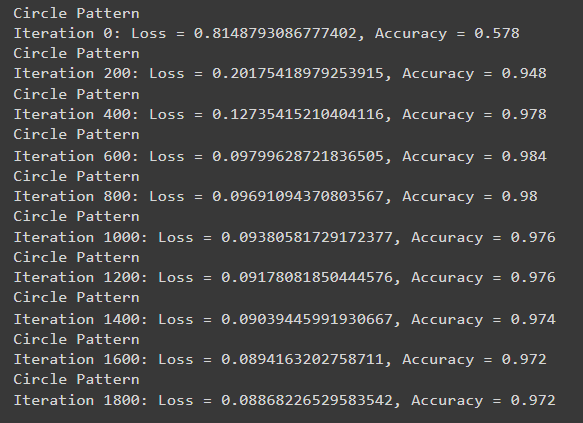

## Diamond Pattern Results

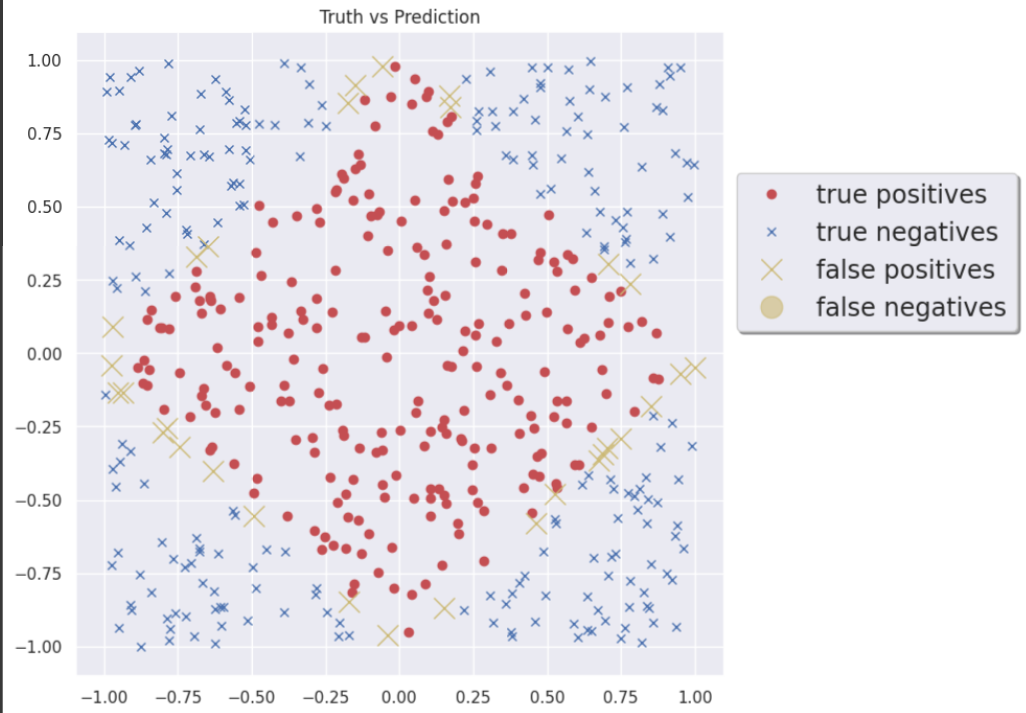

## @ 2000 iterations

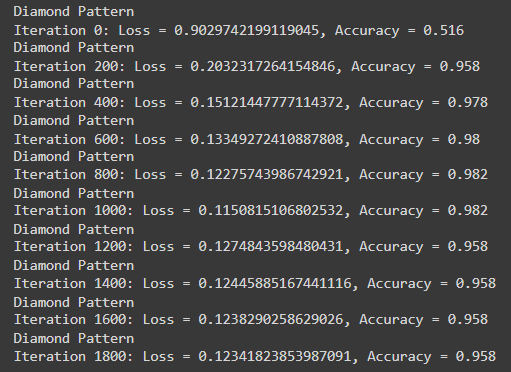

## Thick Right Pattern Results

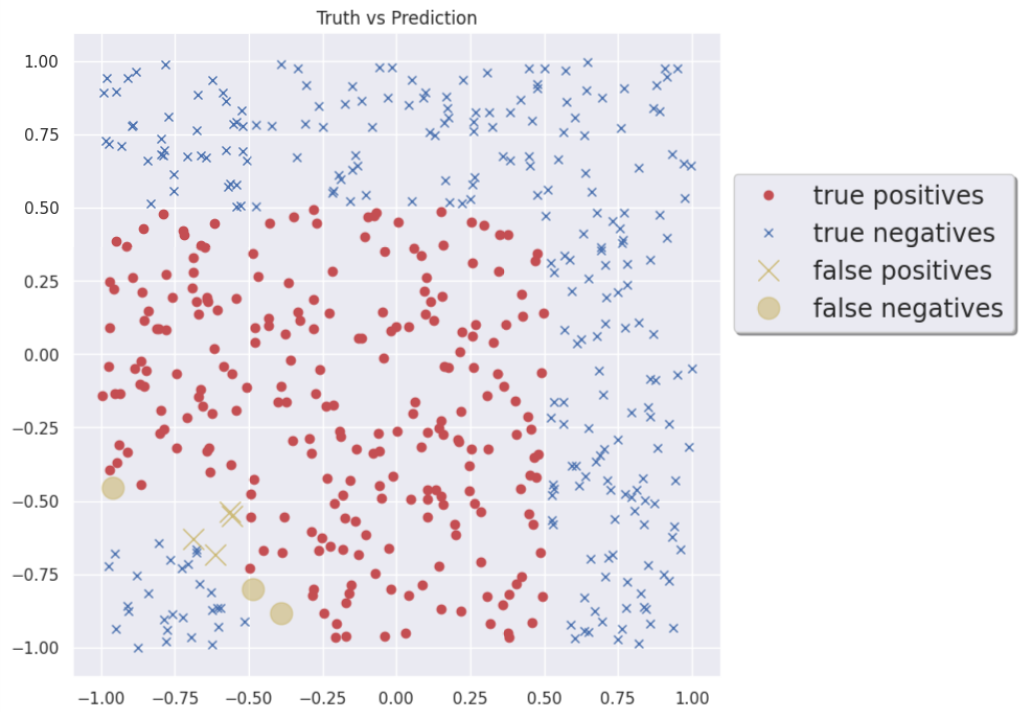

## @ 2000 iterations:

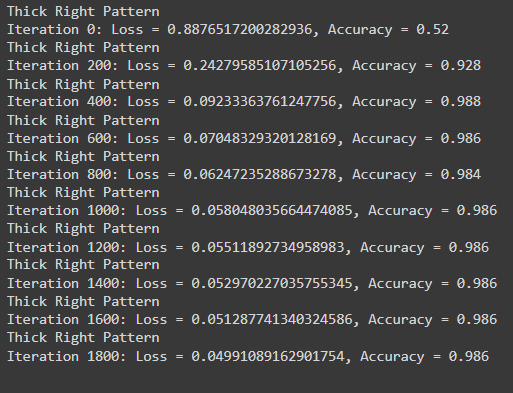

## Thin Right Angle Pattern Results

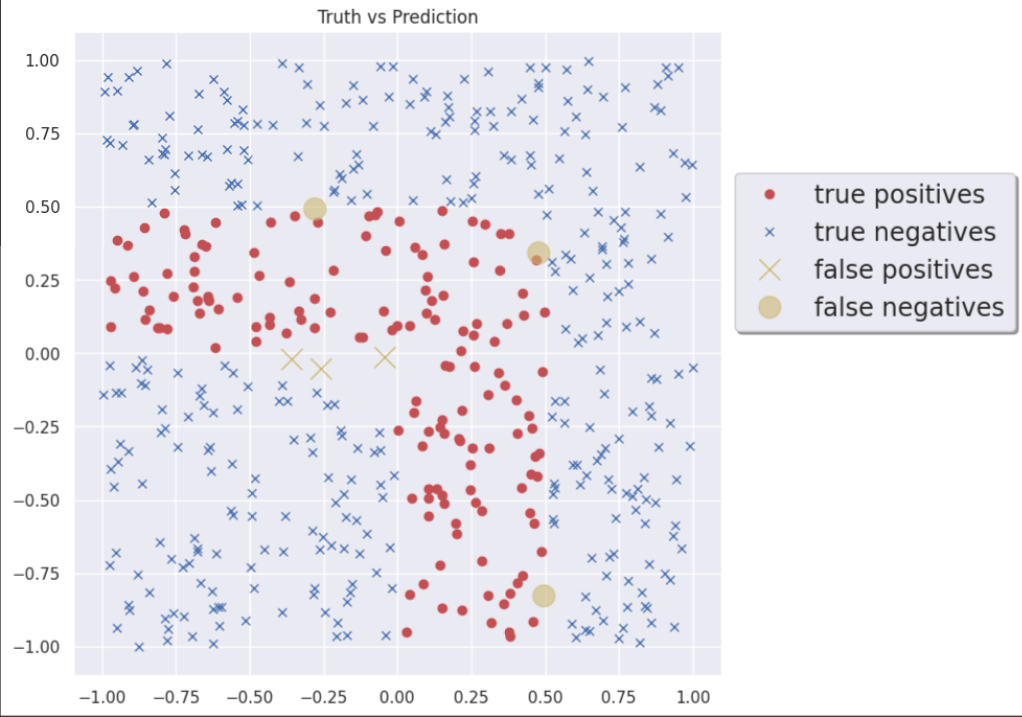

## @ 2000 iterations


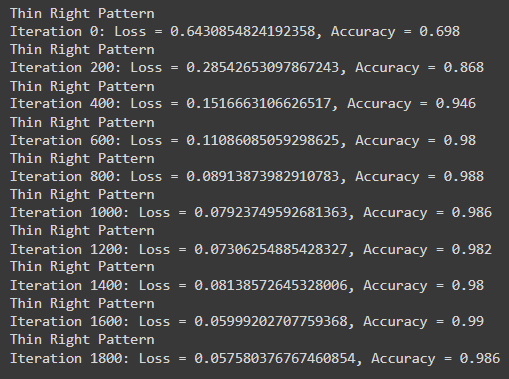

### **Testing Evaluation:** Therefore, thin right angle pattern works best for the instructed datasetand it reduces computational complexity, prevented overfitting, promote generalizations, ensured the training efficiency, and avoided memorizing noise in the array data that we have. Which gives us only 3 false positive and 3 false negative in the plot and has an accuracy of 98.6% with 0.05 loss at the final iteration. This also reached 99% accuracy at second to the last iteration but got back in 98.6% in the end.

#### Supplementary Activity

1. Use a different weights , input and activation function
2. Apply feedforward and backpropagation
3. Plot the loss and accuracy for every 300th iteration


In [ ]:
num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# # Centered square
y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

def leaky_relu(x, alpha=0.01):
    """
    Leaky ReLU activation function
    """
    return np.where(x >= 0, x, alpha * x)

def forward_pass(W_1, W_2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y

    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = leaky_relu(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = leaky_relu(z_3).reshape((len(x_mat),))

    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(a_2.T, J_z_3_grad)
    a_2_z_2_grad = np.where(z_2 >= 0, 1, 0.01)  # Derivative of leaky ReLU
    J_W_1_grad = np.dot(x_mat.T, np.dot(J_z_3_grad.reshape(-1, 1), W_2.reshape(-1, 1).T) * a_2_z_2_grad)

    gradient = (J_W_1_grad, J_W_2_grad)

    return y_pred, gradient

def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)

shape of x_mat_full is (500, 3)
shape of y is (500,)


In [ ]:
# Initialize the network parameters
np.random.seed(5678)
W_1 = np.random.randn(3, 4)  # Random weights for input to hidden layer
W_2 = np.random.randn(4)  # Random weights for hidden layer to output
num_iter = 3000
learning_rate = 0.001
x_mat = x_mat_full

print("Using:")
print("Centered Square Pattern")
print("Leaky RelU activation function\n")

loss_vals, accuracies = [], []
for i in range(num_iter):
    # Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W_1, W_2)

    # Update the weight matrices
    W_1 -= learning_rate * gradient[0]
    W_2 -= learning_rate * gradient[1]

    # Compute loss
    loss = loss_fn(y, y_pred)
    loss_vals.append(loss)

    # Compute accuracy
    accuracy = np.mean((y_pred >= 0.5) == y)
    accuracies.append(accuracy)

    # Print loss and accuracy for every 300th iteration
    if i % 300 == 0:
        print(f"Iteration {i}: Loss = {loss}, Accuracy = {accuracy}")


Using:
Centered Square Pattern
Leaky RelU activation function

Iteration 0: Loss = 14.387282418339352, Accuracy = 0.348
Iteration 300: Loss = 0.3904768391289562, Accuracy = 0.762
Iteration 600: Loss = 0.19564496411997112, Accuracy = 0.946
Iteration 900: Loss = 0.13158399583718589, Accuracy = 0.968
Iteration 1200: Loss = 0.1250500997496268, Accuracy = 0.966
Iteration 1500: Loss = 0.12416981372278452, Accuracy = 0.964
Iteration 1800: Loss = 0.1240188620960528, Accuracy = 0.964
Iteration 2100: Loss = 0.12395304756048028, Accuracy = 0.964
Iteration 2400: Loss = 0.12387516110630145, Accuracy = 0.964
Iteration 2700: Loss = 0.12382007338533495, Accuracy = 0.964


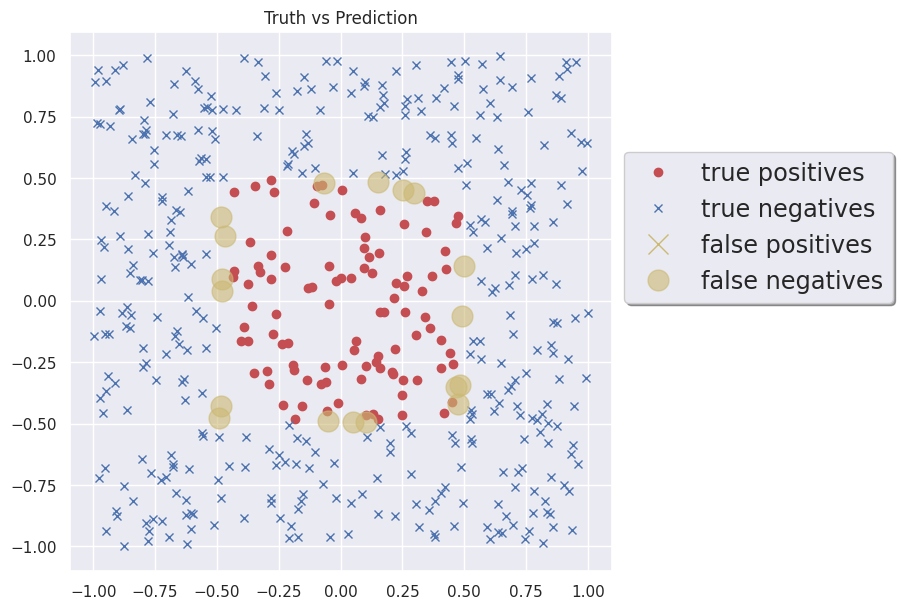

In [ ]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(7, 7))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

### **Supplementary Activity Results Discussion and Evaluation:**

### I managed to use different weight, inputs, and activation function, use feedforward and backpropagation, and plot the loss and accuracy for every 300th iteration using matplotlib, indicating the visual for the truth and prediction. I used random seed 5678 to get different random weights for input and hidden layer. I implemented leaky relU activation function and apply it in the forward_pass function. I also implemented centered square pattern since it works the best for the data that I have been dealing with since it gives 96.4% accuracy with 0.12 loss. Unlike the other patterns which gave me only 92% accuracy for circle pattern and 92% for thin and thick right angle pattern, 70% and less for the other remaining pattern. The point is centered square pattern works best using leaky RelU activation function for its forward computation. I also applied forward computation through the implementation of forward_pass function and use backpropagation in updating the weight matrices. I also plotted the visualization of prediction vs truth and print the accuracy and loss of the neural network I develop.

## **Conclusion**

### In conclusion, I am able to pick up new knowledge in developing neural networks since I encountered many challenges while developing and doing the instructions for this hands on activity. It includes the challenge in comprehension of resources online about neural networks that may take lots of time if you are not able to pick it up in the first place. Also the challenge in time to balance academic and personal matters.

### On the other hand, I do learn lots in this activity about neural networks since I implemented and tested different code approaches and many debugging while doing this neural network activity. I do learn the different patterns used in neural network like circle, diamond, central square, thin right angle, and thick right angle. I also learned different activation function in here since I used both sigmoid and leaky RelU in different part of this activity, also when I tried implementing softmax and relU activation function. I also learned how to increase the accuracy and minimize the loss in the training since I performed debugging about it, including the learning rate, number of iterations, and the weight that is declared. Lastly, I learn how to visualize the prediction of my own neural network.